## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [ ]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

In [70]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
print(data)
#data[0:100]

784594
n00015388_157	http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
n00015388_238	http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg
n00015388_304	http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg
n00015388_327	http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg
n00015388_355	http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
n00015388_373	http://img172.imageshack.us/img172/4606/napo03072en9.jpg
n00015388_379	http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg
n00015388_388	http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg
n00015388_442	http://www.porschemania.it/discus/messages/815/102099.jpg
n00015388_474	http://farm1.static.flickr.com/72/225029238_805b0937ca.jpg
n00015388_514	http://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg
n00015388_671	http://farm4.static.flickr.com/3217/2942611930_d68204f726.jpg
n00015388_686	http://farm1.stat

In [71]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = "\n"
data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [115]:
import pandas as pd

    
df = pd.DataFrame(data)
df.head()

,0
0,n00015388_157\thttp://farm1.static.flickr.com/...
1,n00015388_238\thttp://farm2.static.flickr.com/...
2,n00015388_304\thttp://farm1.static.flickr.com/...
3,n00015388_327\thttp://farm4.static.flickr.com/...
4,n00015388_355\thttp://img100.imageshack.us/img...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

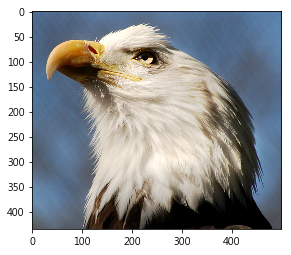

In [209]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link =  df.loc[0] 
first_link = (first_link[0]).split("\t")[1]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [230]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    try:
        img_list = []
        for url in url_list :
            link = url[0].split("\t")[1]
            print(link)
            response = requests.get(link)
            img = Image.open(BytesIO(response.content))      
            plt.imshow(img)
            plt.show()
            img_list.append(img)        

        return img_list
        
    except :
        print()
        
    

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg


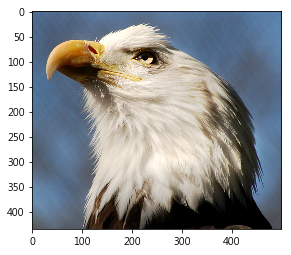

http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg


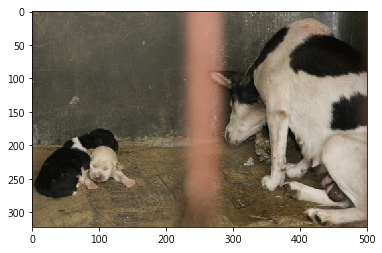

http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg


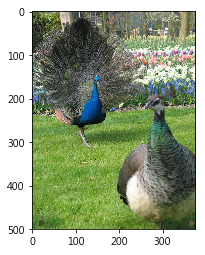

http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg


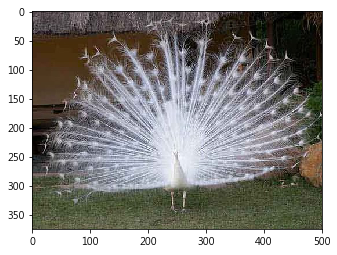

http://img100.imageshack.us/img100/3253/forrest004fs9.jpg


OSError: cannot identify image file <_io.BytesIO object at 0x000000000B4765C8>

In [231]:
result = img2arr_fromURLs(df[0:5].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()